# Recognizing Handwritten Digit on MNIST dataset using KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Get the data from kaggle
!kaggle datasets download -d oddrationale/mnist-in-csv

 85% 13.0M/15.2M [00:01<00:00, 14.1MB/s]
100% 15.2M/15.2M [00:01<00:00, 9.04MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/mnist-in-csv.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Done')

Done


### step1: data preparation

In [5]:
# read your csv file
df=pd.read_csv("/content/mnist_train.csv")

In [6]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(60000, 785)

In [8]:
print(df.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [9]:
# convert the dataframe into an array
data=df.values
print(data.shape)
print(type(data))

(60000, 785)
<class 'numpy.ndarray'>


In [10]:
# devide your data into X and Y
X=data[:,1:]
Y=data[:,0]
print(X.shape,Y.shape)

(60000, 784) (60000,)


In [11]:
# devide your data into your train data and test data
split=int(0.8*X.shape[0])
print(split)

X_train=X[:split,:]
Y_train=Y[:split]

X_test=X[split:,:]
Y_test=Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

48000
(48000, 784) (48000,)
(12000, 784) (12000,)


In [12]:
# draw images
def drawimg(img):
  img=img.reshape((28,28))
  plt.imshow(img,cmap='gray')
  plt.show()

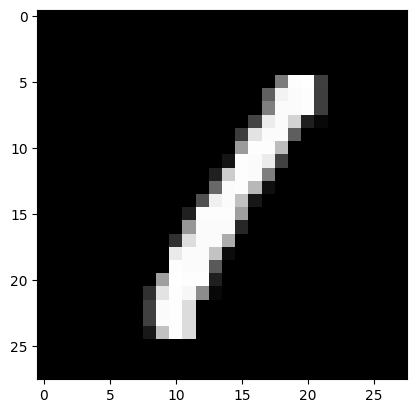

1


In [13]:
drawimg(X_train[3])
print(Y_train[3])

In [14]:
# KN model
def dist(x1,x2):
  return np.sqrt(sum((x1-x2)**2))
def knn(X,Y,q,k=10):
  vals=[]
  m=X.shape[0]
  for i in range(m):
    d=dist(q,X[i,:])
    vals.append((d,Y[i]))
  vals=sorted(vals)
  vals=vals[:k]
  vals=np.array(vals)
  newvals=np.unique(vals[:,1],return_counts=True)
  print(newvals)
  index=newvals[1].argmax()
  return newvals[0][index]

In [15]:
knn(X_train,Y_train,X_test[3])

(array([8.]), array([10]))


8.0

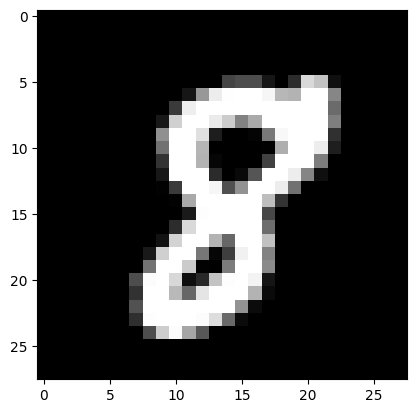

In [16]:
x=drawimg(X_test[3])

In [17]:
# calculate the accuracy of our KNN modle

In [18]:
def acc(X_train,Y_train,X_test,Y_test):
  size=X_test.shape[0]
  c=0
  for i in range(size):
    pred=knn(X_train,Y_train,X_test[i])
    if pred==Y_test[i]:
      c+=1
  return c/size

In [19]:
x=acc(X_train,Y_train,X_test,Y_test)

KeyboardInterrupt: ignored